In [1]:
import sys
import torch
import numpy as np
from functools import partial
sys.path.append("..")

from CPPN import NN
from CPPN import ColorFactory
from CPPN import plot_image

In [2]:
SIZE_X = 1080
SIZE_Y = 1080
LAYERS = 8
NEURONS = 16
OUTPUT_SIZE = 3

paint_net = NN(input_size=2,
               n_neurons=NEURONS,
               n_layers=LAYERS,
               output_size=OUTPUT_SIZE)

In [3]:
factory = ColorFactory()

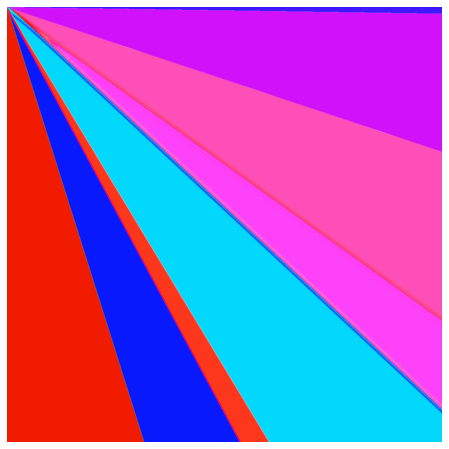

In [4]:
img = factory.generate(pattern='simple', 
                       size_x=SIZE_X, 
                       size_y=SIZE_Y,
                       scale=1)

paint = paint_net(torch.tensor(img).type(torch.FloatTensor))
plot_image(paint, SIZE_X, SIZE_Y)

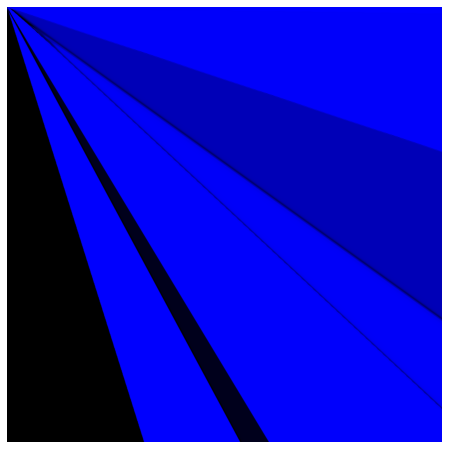

In [5]:
# Now we created the target to learn, the same image but blueish
target_paint = paint
target_paint[:,0]=0.
target_paint[:,1]=0.

plot_image(target_paint,SIZE_X,SIZE_Y)

../CPPN/network.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target)


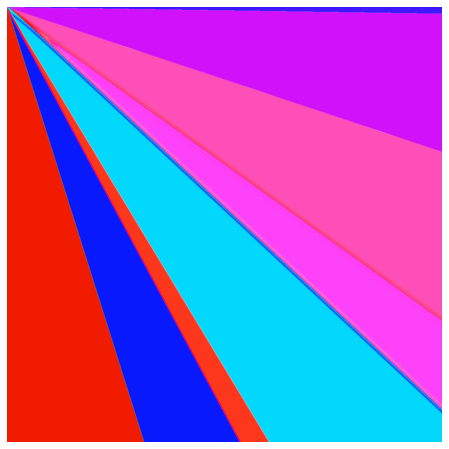

loss:  tensor(0.2582)


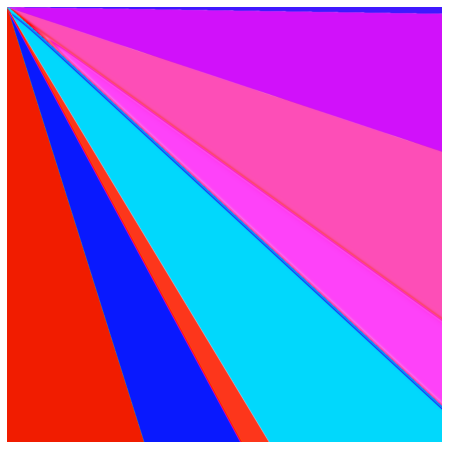

loss:  tensor(0.2576)


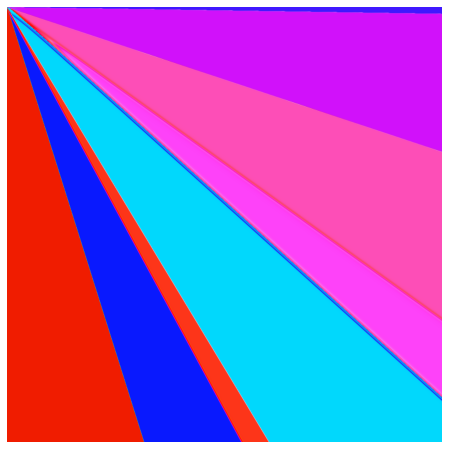

loss:  tensor(0.2560)


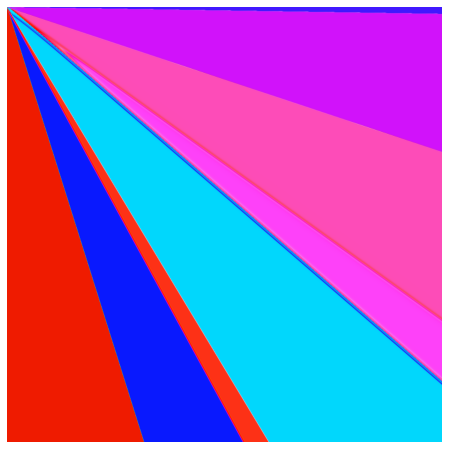

loss:  tensor(0.2526)


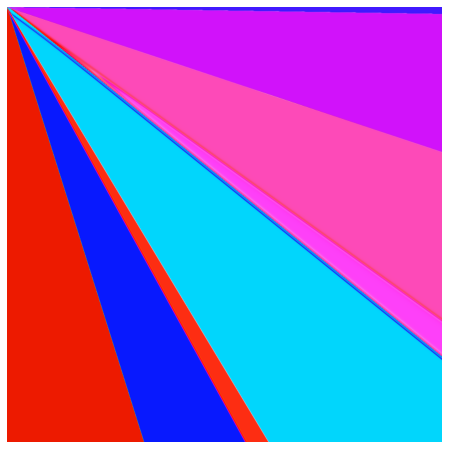

loss:  tensor(0.2473)


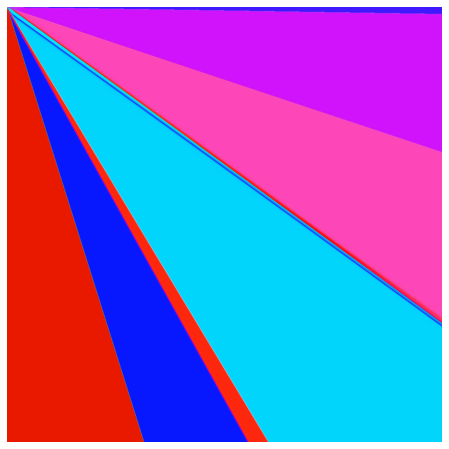

loss:  tensor(0.2399)


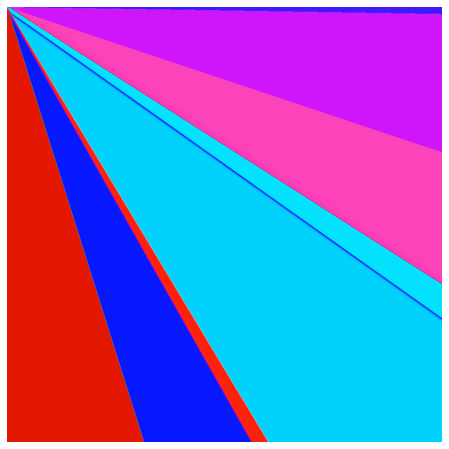

loss:  tensor(0.2320)


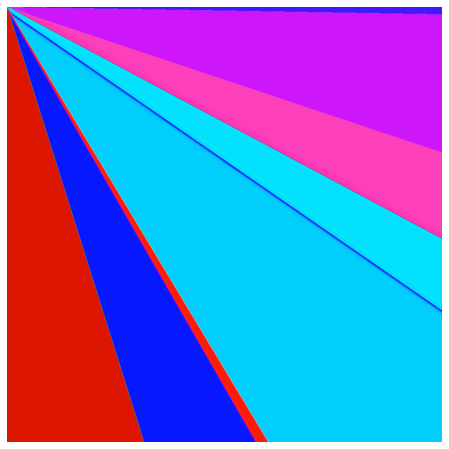

loss:  tensor(0.2209)


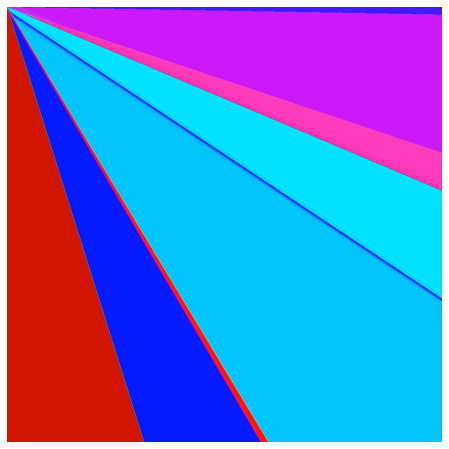

loss:  tensor(0.2048)


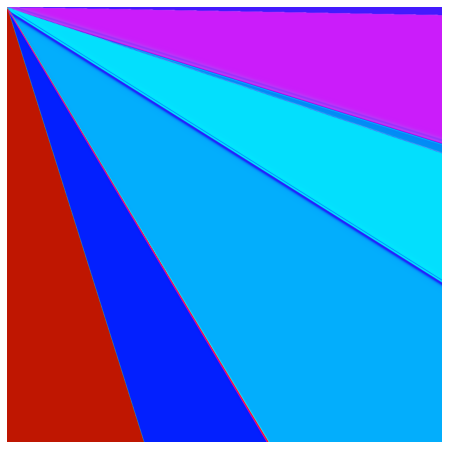

loss:  tensor(0.1762)


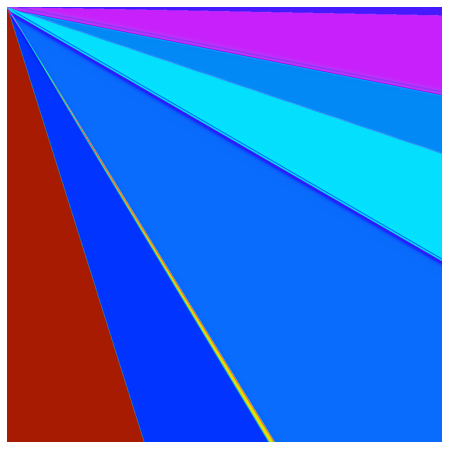

loss:  tensor(0.1262)


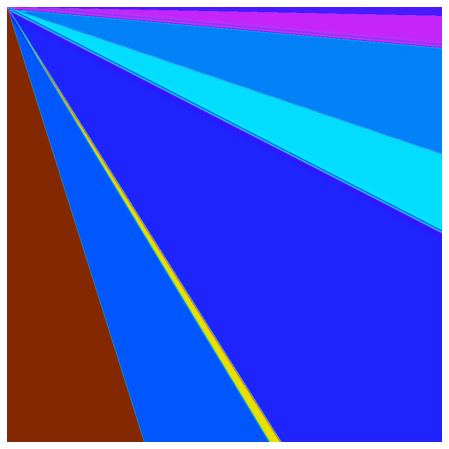

loss:  tensor(0.0933)


In [6]:
# Train the net to learn the new image

source = img
target = target_paint

callback_plot = partial(plot_image,size_x=SIZE_X,size_y=SIZE_Y)
learned_paint = paint_net.train(source, target, 12, callback_plot)